In [1]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from datetime import datetime
import calendar
import json
import csv
import numpy as np
from selenium import webdriver
import time
import math
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
#from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model,load_model, tune_model, pull, get_metrics, finalize_model, get_config, create_model
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pycaret.utils import check_metric
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import statsmodels.api as sm

# Preparation

### Data Preparation

In [2]:
gas_stations_03_28 = pd.read_csv('[HUN_FUEL]03_28.csv')
gas_stations_04_06 = pd.read_csv('[HUN_FUEL]04_06.csv')
gas_stations_04_23 = pd.read_csv('[HUN_FUEL]04_23.csv')

def get_region(zip_code):
    if 1011 <= zip_code <= 1806:
        return 'Budapest'
    elif 2000 <= zip_code <= 2769:
        return 'Pest megye'
    elif (2400 <= zip_code <= 2490) or (8000 <= zip_code <= 8157):
        return 'Fejér megye'
    elif (2500 <= zip_code <= 2545) or (2800 <= zip_code <= 2949):
        return 'Komárom-Esztergom megye'
    elif (2640 <= zip_code <= 2699) or (3041 <= zip_code <= 3253):
        return 'Nógrád megye'
    elif (3000 <= zip_code <= 3036) or (3200 <= zip_code <= 3399):
        return 'Heves megye'
    elif 3400 <= zip_code <= 3999:
        return 'Borsod-Abaúj-Zemplén megye'
    elif 4000 <= zip_code <= 4288:
        return 'Hajdú-Bihar megye'
    elif (4300 <= zip_code <= 4977):
        return 'Szabolcs-Szatmár-Bereg megye'
    elif (5000 <= zip_code <= 5476):
        return 'Jász-Nagykun-Szolnok megye'
    elif (5500 <= zip_code <= 5948):
        return 'Békés megye'
    elif (6000 <= zip_code <= 6528):
        return 'Bács-Kiskun megye'
    elif (6600 <= zip_code <= 6932):
        return 'Csongrád vármegye'
    elif (7020 <= zip_code <= 7228):
        return 'Tolna megye'
    elif (7300 <= zip_code <= 7396) or (7600 <= zip_code <= 7985):
        return 'Baranya megye'
    elif (7400 <= zip_code <= 7589) or (8600 <= zip_code <= 8739):
        return 'Somogy vármegye'
    elif 8161 <= zip_code <= 8598:
        return 'Veszprém megye'
    elif (8353 <= zip_code <= 8395) or (8741 <= zip_code <= 8999):
        return 'Zala megye'
    elif 9001 <= zip_code <= 9495:
        return 'Győr-Moson-Sopron megye'
    elif 9500 <= zip_code <= 9985:
        return 'Vas megye'
    else:
        return math.nan

gas_stations_03_28['County'] = gas_stations_03_28['Post Code'].apply(get_region)
gas_stations_04_06['County'] = gas_stations_04_06['Post Code'].apply(get_region)
gas_stations_04_23['County'] = gas_stations_04_23['Post Code'].apply(get_region)

gas_stations_03_28['Number of competition 10km'] = gas_stations_03_28['Number of competition 10km'] - gas_stations_03_28['Number of competition 5km']
gas_stations_03_28['Number of competition 20km'] = gas_stations_03_28['Number of competition 20km'] - gas_stations_03_28['Number of competition 10km']
gas_stations_03_28['Number of competition 30km'] = gas_stations_03_28['Number of competition 30km'] - gas_stations_03_28['Number of competition 20km']
gas_stations_03_28['Number of competition 40km'] = gas_stations_03_28['Number of competition 40km'] - gas_stations_03_28['Number of competition 30km']
    
gas_stations_04_06['Number of competition 10km'] = gas_stations_04_06['Number of competition 10km'] - gas_stations_04_06['Number of competition 5km']
gas_stations_04_06['Number of competition 20km'] = gas_stations_04_06['Number of competition 20km'] - gas_stations_04_06['Number of competition 10km']
gas_stations_04_06['Number of competition 30km'] = gas_stations_04_06['Number of competition 30km'] - gas_stations_04_06['Number of competition 20km']
gas_stations_04_06['Number of competition 40km'] = gas_stations_04_06['Number of competition 40km'] - gas_stations_04_06['Number of competition 30km']

gas_stations_04_23['Number of competition 10km'] = gas_stations_04_23['Number of competition 10km'] - gas_stations_04_23['Number of competition 5km']
gas_stations_04_23['Number of competition 20km'] = gas_stations_04_23['Number of competition 20km'] - gas_stations_04_23['Number of competition 10km']
gas_stations_04_23['Number of competition 30km'] = gas_stations_04_23['Number of competition 30km'] - gas_stations_04_23['Number of competition 20km']
gas_stations_04_23['Number of competition 40km'] = gas_stations_04_23['Number of competition 40km'] - gas_stations_04_23['Number of competition 30km']


gas_stations_03_28['WC'] = gas_stations_03_28['Services'].str.contains('WC').astype(float).fillna(np.nan)
gas_stations_03_28['Services'] = gas_stations_03_28['Services'].str.split(';').str.len()

gas_stations_04_06['WC'] = gas_stations_04_06['Services'].str.contains('WC').astype(float).fillna(np.nan)
gas_stations_04_06['Services'] = gas_stations_04_06['Services'].str.split(';').str.len()

gas_stations_04_23['WC'] = gas_stations_04_23['Services'].str.contains('WC').astype(float).fillna(np.nan)
gas_stations_04_23['Services'] = gas_stations_04_23['Services'].str.split(';').str.len()

gas_stations_03_28_histogram = gas_stations_03_28
gas_stations_04_06_histogram = gas_stations_04_06
gas_stations_04_23_histogram = gas_stations_04_23

one_hot_franchise = pd.get_dummies(gas_stations_03_28['Franchise (or private)'])
gas_stations_03_28 = pd.concat([gas_stations_03_28, one_hot_franchise], axis=1)
gas_stations_03_28 = gas_stations_03_28.drop('Franchise (or private)', axis = 1)

one_hot_franchise = pd.get_dummies(gas_stations_04_06['Franchise (or private)'])
gas_stations_04_06 = pd.concat([gas_stations_04_06, one_hot_franchise], axis=1)
gas_stations_04_06 = gas_stations_04_06.drop('Franchise (or private)', axis = 1)

one_hot_franchise = pd.get_dummies(gas_stations_04_23['Franchise (or private)'])
gas_stations_04_23 = pd.concat([gas_stations_04_23, one_hot_franchise], axis=1)
gas_stations_04_23 = gas_stations_04_23.drop('Franchise (or private)', axis = 1)

In [3]:
attribs = ['Highway', 'Services','WC', 'Number of competition 1km', 'Number of competition 5km', 
        'Number of competition 10km','Number of competition 20km', 'Number of competition 30km', 'Number of competition 40km', 'Housing', 'Retail stores', 
        'Unemployed 15-64', 'Allowance', 'Income tax per person', 'Commuters Abroad','N drinking water', 'Employed 15-64', 'Tax per 1000', 'N of cars per 1000',
        'N of agriculture', 'Commuter Difference','Income Tax per Person', 'Locally Employed', 'AVIA', 'Lukoil', 'MOL', 'Magán',
       'Mobil Gáz', 'Mobil Petrol', 'OIL!', 'OMV', 'Shell']
targets = ['95-ös Benzin E10', 'Gázolaj', '100-As Benzin E5','Prémium Gázolaj']

gas_stations_03_28 = gas_stations_03_28[attribs + targets]
gas_stations_04_06 = gas_stations_04_06[attribs + targets]
gas_stations_04_23 = gas_stations_04_23[attribs + targets]

#### maybe we need modification here 
#todo

gas_stations_03_28_full = gas_stations_03_28[attribs + targets]
gas_stations_04_06_full = gas_stations_04_06[attribs + targets]
gas_stations_04_23_full = gas_stations_04_23[attribs + targets]

gas_stations_03_28_full['Time'] = '03.28'
gas_stations_04_06_full['Time'] = '04.06'
gas_stations_04_23_full['Time'] = '04.23'

gas_stations_full = pd.concat([gas_stations_03_28_full, gas_stations_04_06_full, gas_stations_04_23_full])

### Checking the endings of the prices:

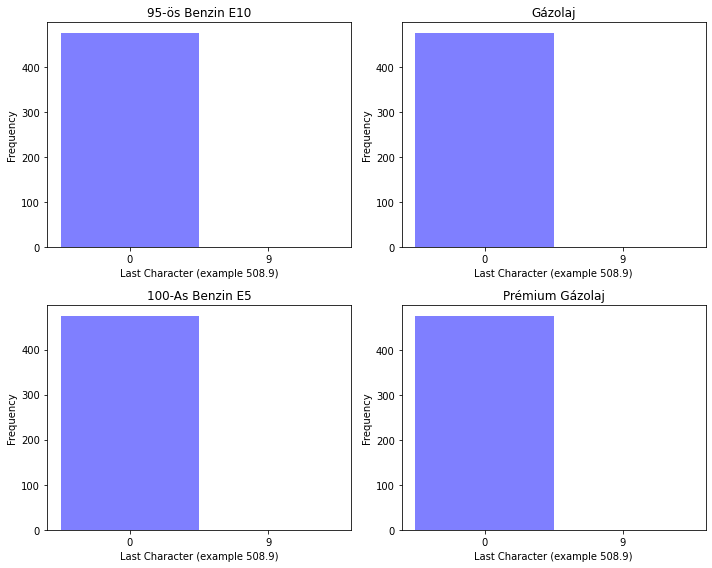

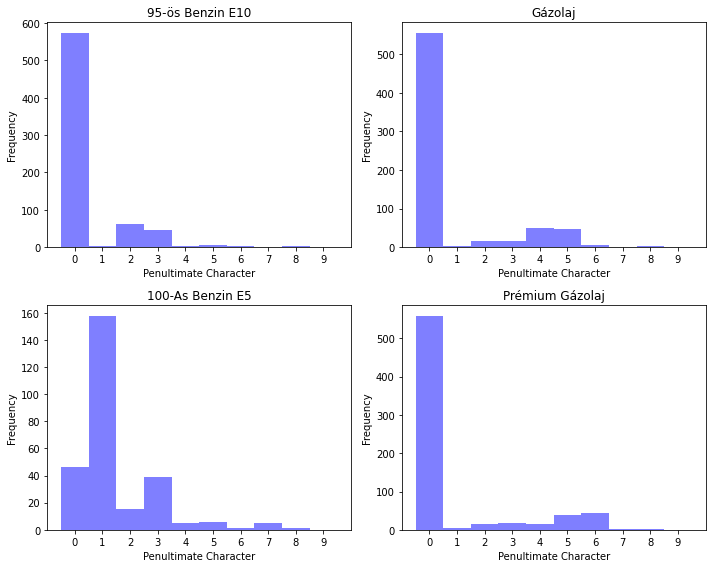

In [4]:
df = gas_stations_03_28[targets]

df = df.dropna()

# get the last character of each value
last_chars = df.applymap(lambda x: str(x)[-1])

# plot the frequency of each last character for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(last_chars.columns):
    # get unique last characters and sort them
    unique_chars = sorted(last_chars[col].unique())

    axs[i].hist(last_chars[col].values, bins=len(unique_chars), range=(0.5, len(unique_chars)+0.5), color='blue', alpha=0.5)
    axs[i].set_xticks(range(1, len(unique_chars)+1))
    axs[i].set_xticklabels(unique_chars)
    axs[i].set_title(col)
    axs[i].set_xlabel('Last Character (example 508.9)')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# get the penultimate character of each value
penultimate_chars = df.applymap(lambda x: str(x)[-3])

# plot the frequency of each penultimate character for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(penultimate_chars.columns):
    # get unique penultimate characters and sort them
    unique_chars = sorted(penultimate_chars[col].unique())

    axs[i].hist(penultimate_chars[col].values, bins=len(unique_chars), range=(0.5, len(unique_chars)+0.5), color='blue', alpha=0.5)
    axs[i].set_xticks(range(1, len(unique_chars)+1))
    axs[i].set_xticklabels(unique_chars)
    axs[i].set_title(col)
    axs[i].set_xlabel('Penultimate Character')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

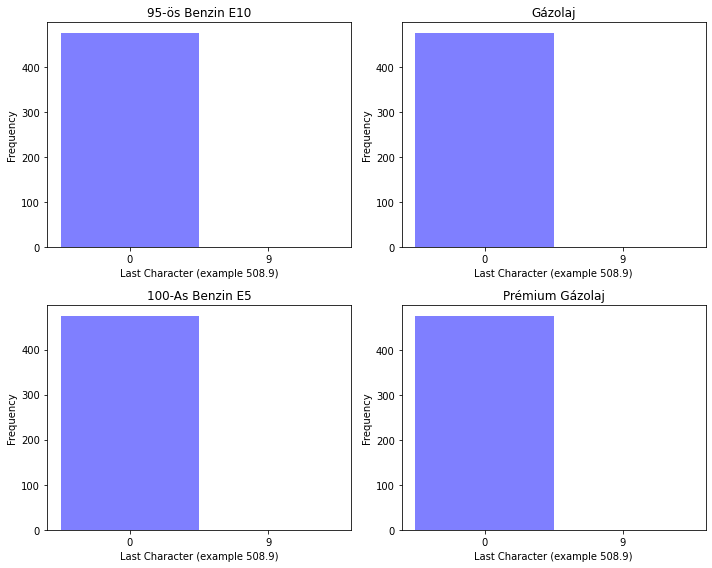

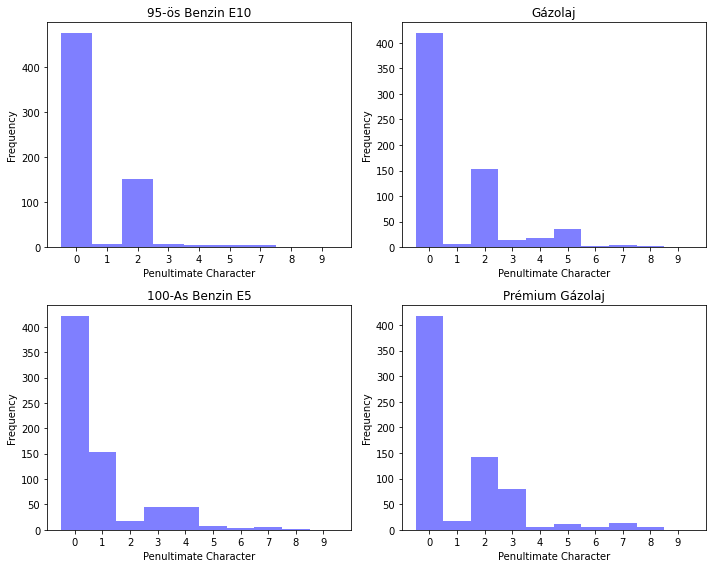

In [5]:
df = gas_stations_04_06[targets]

df = df.dropna()

# get the last character of each value
last_chars = df.applymap(lambda x: str(x)[-1])

# plot the frequency of each last character for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(last_chars.columns):
    # get unique last characters and sort them
    unique_chars = sorted(last_chars[col].unique())

    axs[i].hist(last_chars[col].values, bins=len(unique_chars), range=(0.5, len(unique_chars)+0.5), color='blue', alpha=0.5)
    axs[i].set_xticks(range(1, len(unique_chars)+1))
    axs[i].set_xticklabels(unique_chars)
    axs[i].set_title(col)
    axs[i].set_xlabel('Last Character (example 508.9)')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# get the penultimate character of each value
penultimate_chars = df.applymap(lambda x: str(x)[-3])

# plot the frequency of each penultimate character for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(penultimate_chars.columns):
    # get unique penultimate characters and sort them
    unique_chars = sorted(penultimate_chars[col].unique())

    axs[i].hist(penultimate_chars[col].values, bins=len(unique_chars), range=(0.5, len(unique_chars)+0.5), color='blue', alpha=0.5)
    axs[i].set_xticks(range(1, len(unique_chars)+1))
    axs[i].set_xticklabels(unique_chars)
    axs[i].set_title(col)
    axs[i].set_xlabel('Penultimate Character')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

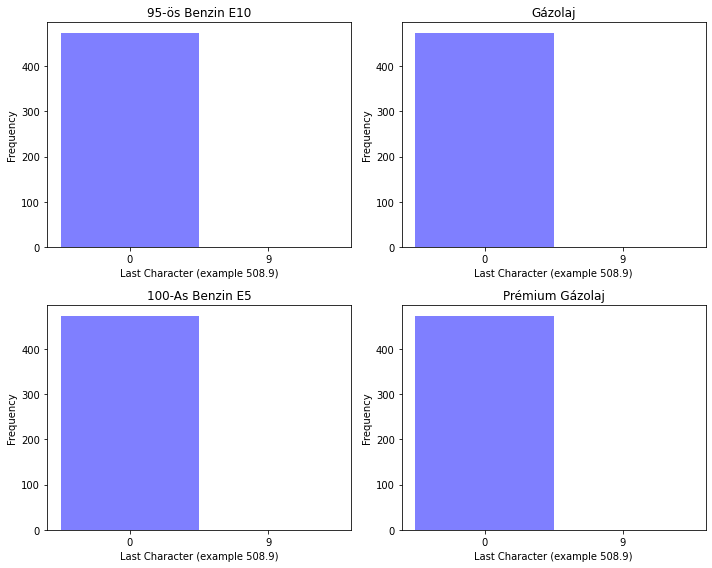

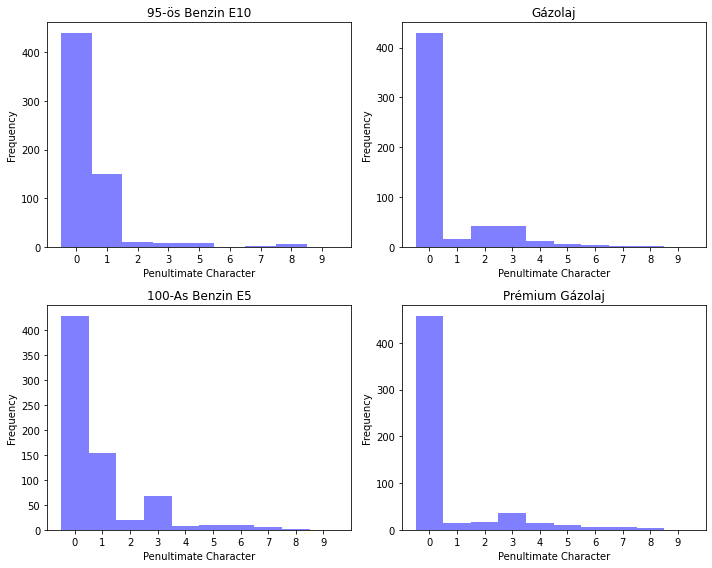

In [6]:
df = gas_stations_04_23[targets]

df = df.dropna()

# get the last character of each value
last_chars = df.applymap(lambda x: str(x)[-1])

# plot the frequency of each last character for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(last_chars.columns):
    # get unique last characters and sort them
    unique_chars = sorted(last_chars[col].unique())

    axs[i].hist(last_chars[col].values, bins=len(unique_chars), range=(0.5, len(unique_chars)+0.5), color='blue', alpha=0.5)
    axs[i].set_xticks(range(1, len(unique_chars)+1))
    axs[i].set_xticklabels(unique_chars)
    axs[i].set_title(col)
    axs[i].set_xlabel('Last Character (example 508.9)')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# get the penultimate character of each value
penultimate_chars = df.applymap(lambda x: str(x)[-3])

# plot the frequency of each penultimate character for each column
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(penultimate_chars.columns):
    # get unique penultimate characters and sort them
    unique_chars = sorted(penultimate_chars[col].unique())

    axs[i].hist(penultimate_chars[col].values, bins=len(unique_chars), range=(0.5, len(unique_chars)+0.5), color='blue', alpha=0.5)
    axs[i].set_xticks(range(1, len(unique_chars)+1))
    axs[i].set_xticklabels(unique_chars)
    axs[i].set_title(col)
    axs[i].set_xlabel('Penultimate Character')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram plot:

/tmp/ipykernel_6057/1376295683.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = gas_stations_full_histogram.groupby(['Address with post code (Gas Stations)', 'Address', 'City', 'Post Code',


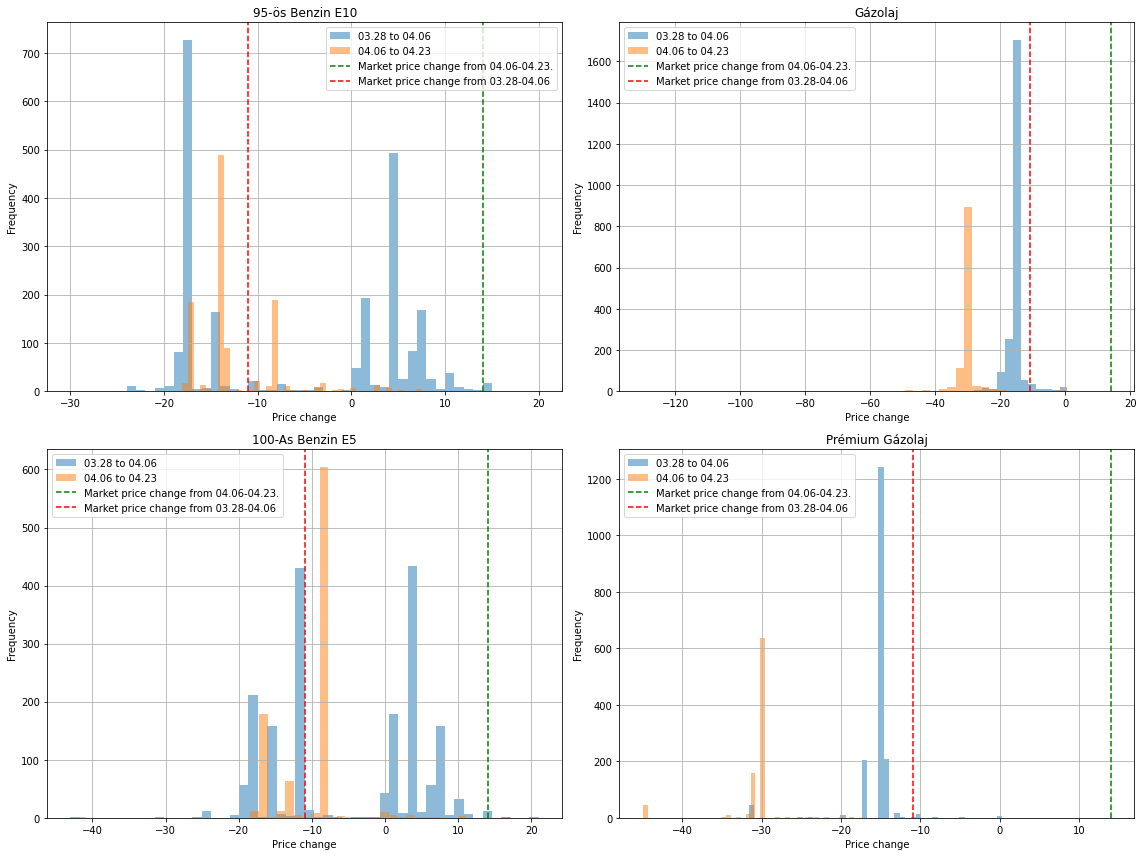

In [7]:
import matplotlib.pyplot as plt

gas_stations_full_histogram = pd.concat([gas_stations_03_28_histogram, gas_stations_04_06_histogram, gas_stations_04_23_histogram])

grouped_df = gas_stations_full_histogram.groupby(['Address with post code (Gas Stations)', 'Address', 'City', 'Post Code',
       'Franchise (or private)', 'Highway', 'Link', 'Services','Address from website'])['95-ös Benzin E10', 'Gázolaj', '100-As Benzin E5', 'Prémium Gázolaj']

price_changes_1 = grouped_df.diff(periods=1)  # 03.28 to 04.06
price_changes_2 = grouped_df.diff(periods=2)  # 06.04 to 04.23

# Set figure size
fig = plt.figure(figsize=(16, 12))

# Plot histograms of price changes for each type of gasoline
plt.subplot(2, 2, 1)
price_changes_1['95-ös Benzin E10'].hist(alpha=0.5, bins=50, label = '03.28 to 04.06')
price_changes_2['95-ös Benzin E10'].hist(alpha=0.5, bins=50, label = '04.06 to 04.23')
plt.axvline(x=14, color='green', linestyle='--', label = 'Market price change from 04.06-04.23.')
plt.axvline(x=-11, color='red', linestyle='--', label = 'Market price change from 03.28-04.06')
plt.legend()
plt.xlabel('Price change')
plt.ylabel('Frequency')
plt.title('95-ös Benzin E10')

plt.subplot(2, 2, 2)
price_changes_1['Gázolaj'].hist(alpha=0.5, bins=50, label = '03.28 to 04.06')
price_changes_2['Gázolaj'].hist(alpha=0.5, bins=50, label = '04.06 to 04.23')
plt.axvline(x=14, color='green', linestyle='--', label = 'Market price change from 04.06-04.23.')
plt.axvline(x=-11, color='red', linestyle='--', label = 'Market price change from 03.28-04.06')
plt.legend()
plt.xlabel('Price change')
plt.ylabel('Frequency')          
plt.title('Gázolaj')

plt.subplot(2, 2, 3)
price_changes_1['100-As Benzin E5'].hist(alpha=0.5, bins=50, label = '03.28 to 04.06')
price_changes_2['100-As Benzin E5'].hist(alpha=0.5, bins=50, label = '04.06 to 04.23')
plt.axvline(x=14, color='green', linestyle='--', label = 'Market price change from 04.06-04.23.')
plt.axvline(x=-11, color='red', linestyle='--', label = 'Market price change from 03.28-04.06')
plt.legend()
plt.xlabel('Price change')
plt.ylabel('Frequency')
plt.title('100-As Benzin E5')

plt.subplot(2, 2, 4)
price_changes_1['Prémium Gázolaj'].hist(alpha=0.5, bins=50, label = '03.28 to 04.06')
price_changes_2['Prémium Gázolaj'].hist(alpha=0.5, bins=50, label = '04.06 to 04.23')
plt.axvline(x=14, color='green', linestyle='--', label = 'Market price change from 04.06-04.23.')
plt.axvline(x=-11, color='red', linestyle='--', label = 'Market price change from 03.28-04.06')
plt.legend()
plt.xlabel('Price change')
plt.ylabel('Frequency')
plt.title('Prémium Gázolaj')

#plt.legend()
plt.tight_layout()
plt.show()

# Linear regression with backward elimination 03 28:

In [8]:
gas_stations = gas_stations_03_28
# Define the columns to be excluded from elimination
comp_cols = ['Number of competition 1km', 'Number of competition 5km', 
        'Number of competition 10km','Number of competition 20km', 'Number of competition 30km', 'Number of competition 40km']
for i in range(4):
    print('----------------------------------------------------------------------------------------------------------------')
    print(targets[i])
    print('----------------------------------------------------------------------------------------------------------------')
    #remove nan
    gas_stations.dropna(subset=attribs + [targets[i]], inplace=True)

    # Define the features and the target variable
    X = gas_stations[attribs]
    y = gas_stations[targets[i]]

    # Adding constant column of ones, required for sm.OLS model
    X_1 = sm.add_constant(X)

    # Fitting sm.OLS model
    model = sm.OLS(y, X_1).fit()

    # Performing backward elimination
    cols = list(X.columns)
    pmax = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        # Exclude competition attributes from removal
        cols_to_remove = [f for f in cols if f not in comp_cols]
        pmax = max(p[cols_to_remove])
        feature_with_p_max = p[cols_to_remove].idxmax()
        if (pmax > 0.05):
            cols.remove(feature_with_p_max)
        else:
            break

    # Selected features
    selected_features = cols
    print('The selected features are: ')
    print(selected_features)

    # Create the new dataframe with selected features
    X_new = X[selected_features]

    # Fit the linear regression model with selected features
    model = sm.OLS(y, sm.add_constant(X_new)).fit()

    # Print the summary of the model
    print(model.summary())

    # Evaluate the model with R-squared
    print("R-squared:", model.rsquared)

----------------------------------------------------------------------------------------------------------------
95-ös Benzin E10
----------------------------------------------------------------------------------------------------------------
The selected features are: 
['Highway', 'Number of competition 1km', 'Number of competition 5km', 'Number of competition 10km', 'Number of competition 20km', 'Number of competition 30km', 'Number of competition 40km', 'AVIA', 'Lukoil', 'MOL', 'Magán', 'Mobil Gáz', 'Mobil Petrol', 'OIL!', 'OMV', 'Shell']
                            OLS Regression Results                            
Dep. Variable:       95-ös Benzin E10   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     160.6
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.12e-227
Time:                        14:36:26   Log-Likelihood:  

# Linear regression with backward elimination 04 06:

In [9]:
gas_stations = gas_stations_04_06
# Define the columns to be excluded from elimination
comp_cols = ['Number of competition 1km', 'Number of competition 5km', 
        'Number of competition 10km','Number of competition 20km', 'Number of competition 30km', 'Number of competition 40km']
for i in range(4):
    print('----------------------------------------------------------------------------------------------------------------')
    print(targets[i])
    print('----------------------------------------------------------------------------------------------------------------')
    #remove nan
    gas_stations.dropna(subset=attribs + [targets[i]], inplace=True)

    # Define the features and the target variable
    X = gas_stations[attribs]
    y = gas_stations[targets[i]]

    # Adding constant column of ones, required for sm.OLS model
    X_1 = sm.add_constant(X)

    # Fitting sm.OLS model
    model = sm.OLS(y, X_1).fit()

    # Performing backward elimination
    cols = list(X.columns)
    pmax = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        # Exclude competition attributes from removal
        cols_to_remove = [f for f in cols if f not in comp_cols]
        pmax = max(p[cols_to_remove])
        feature_with_p_max = p[cols_to_remove].idxmax()
        if (pmax > 0.05):
            cols.remove(feature_with_p_max)
        else:
            break

    # Selected features
    selected_features = cols
    print('The selected features are: ')
    print(selected_features)

    # Create the new dataframe with selected features
    X_new = X[selected_features]

    # Fit the linear regression model with selected features
    model = sm.OLS(y, sm.add_constant(X_new)).fit()

    # Print the summary of the model
    print(model.summary())

    # Evaluate the model with R-squared
    print("R-squared:", model.rsquared)

----------------------------------------------------------------------------------------------------------------
95-ös Benzin E10
----------------------------------------------------------------------------------------------------------------
The selected features are: 
['Highway', 'Number of competition 1km', 'Number of competition 5km', 'Number of competition 10km', 'Number of competition 20km', 'Number of competition 30km', 'Number of competition 40km', 'AVIA', 'Lukoil', 'MOL', 'Magán', 'Mobil Gáz', 'Mobil Petrol', 'OIL!', 'OMV', 'Shell']
                            OLS Regression Results                            
Dep. Variable:       95-ös Benzin E10   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     155.9
Date:                Fri, 05 May 2023   Prob (F-statistic):          8.80e-224
Time:                        14:36:28   Log-Likelihood:  

# Linear regression with backward elimination 04 23:

In [10]:
gas_stations = gas_stations_04_23
# Define the columns to be excluded from elimination
comp_cols = ['Number of competition 1km', 'Number of competition 5km', 
        'Number of competition 10km','Number of competition 20km', 'Number of competition 30km', 'Number of competition 40km']
for i in range(4):
    print('----------------------------------------------------------------------------------------------------------------')
    print(targets[i])
    print('----------------------------------------------------------------------------------------------------------------')
    #remove nan
    gas_stations.dropna(subset=attribs + [targets[i]], inplace=True)

    # Define the features and the target variable
    X = gas_stations[attribs]
    y = gas_stations[targets[i]]

    # Adding constant column of ones, required for sm.OLS model
    X_1 = sm.add_constant(X)

    # Fitting sm.OLS model
    model = sm.OLS(y, X_1).fit()

    # Performing backward elimination
    cols = list(X.columns)
    pmax = 1
    while (len(cols) > 0):
        p = []
        X_1 = X[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = pd.Series(model.pvalues.values[1:], index=cols)
        # Exclude competition attributes from removal
        cols_to_remove = [f for f in cols if f not in comp_cols]
        pmax = max(p[cols_to_remove])
        feature_with_p_max = p[cols_to_remove].idxmax()
        if (pmax > 0.05):
            cols.remove(feature_with_p_max)
        else:
            break

    # Selected features
    selected_features = cols
    print('The selected features are: ')
    print(selected_features)

    # Create the new dataframe with selected features
    X_new = X[selected_features]

    # Fit the linear regression model with selected features
    model = sm.OLS(y, sm.add_constant(X_new)).fit()

    # Print the summary of the model
    print(model.summary())

    # Evaluate the model with R-squared
    print("R-squared:", model.rsquared)

----------------------------------------------------------------------------------------------------------------
95-ös Benzin E10
----------------------------------------------------------------------------------------------------------------
The selected features are: 
['Highway', 'Number of competition 1km', 'Number of competition 5km', 'Number of competition 10km', 'Number of competition 20km', 'Number of competition 30km', 'Number of competition 40km', 'Allowance', 'AVIA', 'Lukoil', 'MOL', 'Magán', 'Mobil Gáz', 'Mobil Petrol', 'OIL!', 'OMV', 'Shell']
                            OLS Regression Results                            
Dep. Variable:       95-ös Benzin E10   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     124.5
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.97e-203
Time:                        14:36:30   Log-

# Full Linear Regression

## Linear Regression 03 28

In [11]:
gas_stations = gas_stations_03_28

for i in range(4):
    print('----------------------------------------------------------------------------------------------------------------')
    print(targets[i])
    print('----------------------------------------------------------------------------------------------------------------')
    #remove nan
    gas_stations.dropna(subset=attribs + [targets[i]], inplace=True)

    # Define the features and the target variable
    X = gas_stations[attribs]
    y = gas_stations[targets[i]]

    # Adding constant column of ones, required for sm.OLS model
    X_1 = sm.add_constant(X)

    # Fitting sm.OLS model
    model = sm.OLS(y, X_1).fit()

    # Use all the features as selected features
    selected_features = attribs

    # Create the new dataframe with selected features
    X_new = X[selected_features]

    # Fit the linear regression model with all features
    model = sm.OLS(y, sm.add_constant(X_new)).fit()

    # Print the summary of the model
    print(model.summary())

    # Evaluate the model with R-squared
    print("R-squared:", model.rsquared)

----------------------------------------------------------------------------------------------------------------
95-ös Benzin E10
----------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:       95-ös Benzin E10   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     169.2
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.01e-269
Time:                        14:36:32   Log-Likelihood:                -1518.9
No. Observations:                 629   AIC:                             3100.
Df Residuals:                     598   BIC:                             3238.
Df Model:                          30                                         
Covariance Type:            nonrobust         

## Linear Regression 04 06

In [12]:
gas_stations = gas_stations_04_06

for i in range(4):
    print('----------------------------------------------------------------------------------------------------------------')
    print(targets[i])
    print('----------------------------------------------------------------------------------------------------------------')
    #remove nan
    gas_stations.dropna(subset=attribs + [targets[i]], inplace=True)

    # Define the features and the target variable
    X = gas_stations[attribs]
    y = gas_stations[targets[i]]

    # Adding constant column of ones, required for sm.OLS model
    X_1 = sm.add_constant(X)

    # Fitting sm.OLS model
    model = sm.OLS(y, X_1).fit()

    # Use all the features as selected features
    selected_features = attribs

    # Create the new dataframe with selected features
    X_new = X[selected_features]

    # Fit the linear regression model with all features
    model = sm.OLS(y, sm.add_constant(X_new)).fit()

    # Print the summary of the model
    print(model.summary())

    # Evaluate the model with R-squared
    print("R-squared:", model.rsquared)

----------------------------------------------------------------------------------------------------------------
95-ös Benzin E10
----------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:       95-ös Benzin E10   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     178.2
Date:                Fri, 05 May 2023   Prob (F-statistic):          5.09e-276
Time:                        14:36:32   Log-Likelihood:                -1501.0
No. Observations:                 630   AIC:                             3064.
Df Residuals:                     599   BIC:                             3202.
Df Model:                          30                                         
Covariance Type:            nonrobust         

## Linear Regression 04 23

In [13]:
gas_stations = gas_stations_04_23

for i in range(4):
    print('----------------------------------------------------------------------------------------------------------------')
    print(targets[i])
    print('----------------------------------------------------------------------------------------------------------------')
    #remove nan
    gas_stations.dropna(subset=attribs + [targets[i]], inplace=True)

    # Define the features and the target variable
    X = gas_stations[attribs]
    y = gas_stations[targets[i]]

    # Adding constant column of ones, required for sm.OLS model
    X_1 = sm.add_constant(X)

    # Fitting sm.OLS model
    model = sm.OLS(y, X_1).fit()

    # Use all the features as selected features
    selected_features = attribs

    # Create the new dataframe with selected features
    X_new = X[selected_features]

    # Fit the linear regression model with all features
    model = sm.OLS(y, sm.add_constant(X_new)).fit()

    # Print the summary of the model
    print(model.summary())

    # Evaluate the model with R-squared
    print("R-squared:", model.rsquared)

----------------------------------------------------------------------------------------------------------------
95-ös Benzin E10
----------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:       95-ös Benzin E10   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 05 May 2023   Prob (F-statistic):          4.71e-280
Time:                        14:36:33   Log-Likelihood:                -1505.1
No. Observations:                 630   AIC:                             3072.
Df Residuals:                     599   BIC:                             3210.
Df Model:                          30                                         
Covariance Type:            nonrobust         